In [1]:
# import required libraries
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Import the Datasets
This project is utilizing two different datasets, the "Daily Operations Details" of Natural Gas transmission and the "Daily Weather Data" of 15 weather stations in Saskatchewan from November 1, 2013 to October 31, 2023. The Daily Operations data obtained from TransGas website is the snapshot of the receipt, delivery and storage activity on the TransGas system. 

In [2]:
# Import the "Saskatchewan Daily Natural Gas Demand" dataset
transgas_df = pd.read_csv('../data/transgas-daily-operations.csv')
transgas_df.head()

Date  Saskatchewan Receipts  Interconnected Receipts  Total Receipts  \
0  2013-11-01                    382                      297             688   
1  2013-11-02                    380                      307             696   
2  2013-11-03                    374                      307             690   
3  2013-11-04                    366                      267             642   
4  2013-11-05                    367                      305             681   

   Saskatchewan Deliveries  Interconnected Deliveries  Exports  \
0                      617                          0        3   
1                      630                          0        3   
2                      688                          0        3   
3                      815                          0        3   
4                      789                          0        3   

   Total Deliveries  TransGas Storage Inventory  TransGas Storage % Full  \
0               620                       47098                      0.0   
1               633                       47144                      0.0   
2               691                       47190                      0.0   
3               818                       47201                      0.0   
4               792                       47133                      0.0   

   Third Party Storage Injection  Third Party Storage Production  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   TransGas Storage Injection  TransGas Storage Production  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   Total Storage Activities  Operational Adjustments  
0                         0                      -68  
1                         0                      -63  
2                         0                        1  
3                         0                      176  
4                         0                      111

In [3]:
transgas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            3652 non-null   object 
 1   Saskatchewan Receipts           3652 non-null   int64  
 2   Interconnected Receipts         3652 non-null   int64  
 3   Total Receipts                  3652 non-null   int64  
 4   Saskatchewan Deliveries         3652 non-null   int64  
 5   Interconnected Deliveries       3652 non-null   int64  
 6   Exports                         3652 non-null   int64  
 7   Total Deliveries                3652 non-null   int64  
 8   TransGas Storage Inventory      3652 non-null   int64  
 9   TransGas Storage % Full         3652 non-null   float64
 10  Third Party Storage Injection   3652 non-null   int64  
 11  Third Party Storage Production  3652 non-null   int64  
 12  TransGas Storage Injection      36

- There are no null values in the TransGas DataFrame, which is great because we won’t have to do any null value imputation.
- To forecast the daily consumption of natural gas in Saskatchewan using Time Series, we will be dropping the rest of the fields in transgas, except "Date" and "Saskatchewan Deliveries".

In [4]:
demand_df = transgas_df[['Date', 'Saskatchewan Deliveries']]
demand_df.head()

Date  Saskatchewan Deliveries
0  2013-11-01                      617
1  2013-11-02                      630
2  2013-11-03                      688
3  2013-11-04                      815
4  2013-11-05                      789

In [5]:
# Import the "Saskatchewan Daily Weather" dataset
weather_df = pd.read_csv('../data/weather-data.csv')
weather_df.head()

DATE                 ID STATION_IDENTIFIER  STATION_NAME  \
0  2013-11-01 0:00  4015322.2013.11.1            4015322  MOOSE JAW CS   
1  2013-11-02 0:00  4015322.2013.11.2            4015322  MOOSE JAW CS   
2  2013-11-03 0:00  4015322.2013.11.3            4015322  MOOSE JAW CS   
3  2013-11-04 0:00  4015322.2013.11.4            4015322  MOOSE JAW CS   
4  2013-11-05 0:00  4015322.2013.11.5            4015322  MOOSE JAW CS   

   LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0                 42.0                  90.0                 12.8   
1                 30.0                  88.0                 14.5   
2                 55.0                  92.0                 14.3   
3                 72.0                  88.0                 22.6   
4                 65.0                  91.0                 27.5   

   COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  \
0                  0.0                  0.2                -0.4   
1                  0.0                  0.0                -5.8   
2                  0.0                  5.0                -0.7   
3                  0.0                  0.4                -8.4   
4                  0.0                  0.0               -15.5   

   AVG_TEMPERATURE  HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  SPEED_MAX_GUST  
0              5.2                 10.8                29.0            48.0  
1              3.5                 12.8                11.0            32.0  
2              3.7                  8.1                30.0            59.0  
3             -4.6                 -0.7                29.0            69.0  
4             -9.5                 -3.4                30.0            41.0

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57754 entries, 0 to 57753
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  57726 non-null  object 
 1   ID                    57726 non-null  object 
 2   STATION_IDENTIFIER    57726 non-null  object 
 3   STATION_NAME          57726 non-null  object 
 4   LOWEST_REL_HUMIDITY   29393 non-null  float64
 5   HIGHEST_REL_HUMIDITY  29415 non-null  float64
 6   HEATING_DEGREE_DAYS   57023 non-null  float64
 7   COOLING_DEGREE_DAYS   57023 non-null  float64
 8   TOTAL_PRECIPITATION   56381 non-null  float64
 9   LOWEST_TEMPERATURE    57271 non-null  float64
 10  AVG_TEMPERATURE       57023 non-null  float64
 11  HIGHEST_TEMPERATURE   57068 non-null  float64
 12  DIRECTION_MAX_GUST    49554 non-null  float64
 13  SPEED_MAX_GUST        49516 non-null  float64
dtypes: float64(10), object(4)
memory usage: 6.2+ MB


## Step 2: Data Preprocessing
- Clean and handle missing data for both datasets
- Calculate the average Saskatchewan daily weather factors from all the stations
- 
Combine natural gas demand and weather factors data
- 
Ensure the data is in time-series format.

#### 1. Clean and handle missing data for both datasets
Since the Natural Gas demand dataset is clean and no missing value, we will proceed to the preprocessing the weather dataset.

In [7]:
# Checking for "Station_Name" uniques
unique_values = weather_df['STATION_NAME'].unique()
print(unique_values)

['MOOSE JAW CS' 'REGINA RCS' 'YORKTON' 'WEYBURN' 'ASSINIBOIA AIRPORT'
 'MAPLE CREEK' 'SWIFT CURRENT' 'KINDERSLEY A' 'SCOTT CDA'
 'NORTH BATTLEFORD RCS' 'LLOYDMINSTER' 'MEADOW LAKE' 'PRINCE ALBERT A'
 'MELFORT' 'SASKATOON RCS' 'ESTEVAN' nan]


In [8]:
# Counting the numbers of "NaN" values in the Station_Name features
nan_count = weather_df['STATION_NAME'].isna().sum()
print(nan_count)

28


In [9]:
# Convert 'Date' column to datetime and remove time
weather_df['DATE'] = pd.to_datetime(weather_df['DATE']).dt.date
weather_df

DATE                 ID STATION_IDENTIFIER  STATION_NAME  \
0      2013-11-01  4015322.2013.11.1            4015322  MOOSE JAW CS   
1      2013-11-02  4015322.2013.11.2            4015322  MOOSE JAW CS   
2      2013-11-03  4015322.2013.11.3            4015322  MOOSE JAW CS   
3      2013-11-04  4015322.2013.11.4            4015322  MOOSE JAW CS   
4      2013-11-05  4015322.2013.11.5            4015322  MOOSE JAW CS   
...           ...                ...                ...           ...   
57749         NaN                NaN                NaN           NaN   
57750         NaN                NaN                NaN           NaN   
57751         NaN                NaN                NaN           NaN   
57752         NaN                NaN                NaN           NaN   
57753         NaN                NaN                NaN           NaN   

       LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0                     42.0                  90.0                 12.8   
1                     30.0                  88.0                 14.5   
2                     55.0                  92.0                 14.3   
3                     72.0                  88.0                 22.6   
4                     65.0                  91.0                 27.5   
...                    ...                   ...                  ...   
57749                  NaN                   NaN                  NaN   
57750                  NaN                   NaN                  NaN   
57751                  NaN                   NaN                  NaN   
57752                  NaN                   NaN                  NaN   
57753                  NaN                   NaN                  NaN   

       COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  \
0                      0.0                  0.2                -0.4   
1                      0.0                  0.0                -5.8   
2                      0.0                  5.0                -0.7   
3                      0.0                  0.4                -8.4   
4                      0.0                  0.0               -15.5   
...                    ...                  ...                 ...   
57749                  NaN                  NaN                 NaN   
57750                  NaN                  NaN                 NaN   
57751                  NaN                  NaN                 NaN   
57752                  NaN                  NaN                 NaN   
57753                  NaN                  NaN                 NaN   

       AVG_TEMPERATURE  HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  \
0                  5.2                 10.8                29.0   
1                  3.5                 12.8                11.0   
2                  3.7                  8.1                30.0   
3                 -4.6                 -0.7                29.0   
4                 -9.5                 -3.4                30.0   
...                ...                  ...                 ...   
57749              NaN                  NaN                 NaN   
57750              NaN                  NaN                 NaN   
57751              NaN                  NaN                 NaN   
57752              NaN                  NaN                 NaN   
57753              NaN                  NaN                 NaN   

       SPEED_MAX_GUST  
0                48.0  
1                32.0  
2                59.0  
3                69.0  
4                41.0  
...               ...  
57749             NaN  
57750             NaN  
57751             NaN  
57752             NaN  
57753             NaN  

[57754 rows x 14 columns]

In [10]:
# Drop rows with NaN in 'Date' column
weather_df = weather_df.dropna(subset=['DATE'])
weather_df

DATE                  ID STATION_IDENTIFIER  STATION_NAME  \
0      2013-11-01   4015322.2013.11.1            4015322  MOOSE JAW CS   
1      2013-11-02   4015322.2013.11.2            4015322  MOOSE JAW CS   
2      2013-11-03   4015322.2013.11.3            4015322  MOOSE JAW CS   
3      2013-11-04   4015322.2013.11.4            4015322  MOOSE JAW CS   
4      2013-11-05   4015322.2013.11.5            4015322  MOOSE JAW CS   
...           ...                 ...                ...           ...   
57721  2023-10-27  4012410.2023.10.27            4012410       ESTEVAN   
57722  2023-10-28  4012410.2023.10.28            4012410       ESTEVAN   
57723  2023-10-29  4012410.2023.10.29            4012410       ESTEVAN   
57724  2023-10-30  4012410.2023.10.30            4012410       ESTEVAN   
57725  2023-10-31  4012410.2023.10.31            4012410       ESTEVAN   

       LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0                     42.0                  90.0                 12.8   
1                     30.0                  88.0                 14.5   
2                     55.0                  92.0                 14.3   
3                     72.0                  88.0                 22.6   
4                     65.0                  91.0                 27.5   
...                    ...                   ...                  ...   
57721                 73.0                  88.0                 26.5   
57722                 67.0                  90.0                 25.8   
57723                 69.0                  90.0                 23.9   
57724                 55.0                  84.0                 28.0   
57725                 61.0                  84.0                 28.2   

       COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  \
0                      0.0                  0.2                -0.4   
1                      0.0                  0.0                -5.8   
2                      0.0                  5.0                -0.7   
3                      0.0                  0.4                -8.4   
4                      0.0                  0.0               -15.5   
...                    ...                  ...                 ...   
57721                  0.0                  0.7               -12.6   
57722                  0.0                  0.0               -11.0   
57723                  0.0                  0.8                -9.2   
57724                  0.0                  0.0               -16.7   
57725                  0.0                  0.0               -18.1   

       AVG_TEMPERATURE  HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  \
0                  5.2                 10.8                29.0   
1                  3.5                 12.8                11.0   
2                  3.7                  8.1                30.0   
3                 -4.6                 -0.7                29.0   
4                 -9.5                 -3.4                30.0   
...                ...                  ...                 ...   
57721             -8.5                 -4.3                30.0   
57722             -7.8                 -4.5                24.0   
57723             -5.9                 -2.7                28.0   
57724            -10.0                 -3.4                35.0   
57725            -10.2                 -2.3                21.0   

       SPEED_MAX_GUST  
0                48.0  
1                32.0  
2                59.0  
3                69.0  
4                41.0  
...               ...  
57721            33.0  
57722            36.0  
57723            39.0  
57724            70.0  
57725            39.0  

[57726 rows x 14 columns]

In [11]:
# Counting the numbers of NaN values for other columns in the weather dataset
nan_counts = weather_df.isna().sum()

# Display the NaN counts for each column
print(nan_counts)

DATE                        0
ID                          0
STATION_IDENTIFIER          0
STATION_NAME                0
LOWEST_REL_HUMIDITY     28333
HIGHEST_REL_HUMIDITY    28311
HEATING_DEGREE_DAYS       703
COOLING_DEGREE_DAYS       703
TOTAL_PRECIPITATION      1345
LOWEST_TEMPERATURE        455
AVG_TEMPERATURE           703
HIGHEST_TEMPERATURE       658
DIRECTION_MAX_GUST       8172
SPEED_MAX_GUST           8210
dtype: int64


#### Handling Missing Values
- Typically, the optimal approach to handling missing data is eliminating the rows with these missing values. However, another method to consider is imputation, a technique that replaces missing data with artificially generated values.

- Understanding that imputing annual seasonal mean or median values could significantly impact the performance of the model used to assess the influence of weather factors on natural gas demands, we’ve decided to fill all NaN values with zeros. This decision is based on the assumption that zero would have a lesser impact on the model’s performance.

In [12]:
# Replace all NaN values with 0
weather_df = weather_df.fillna(0)
weather_df

DATE                  ID STATION_IDENTIFIER  STATION_NAME  \
0      2013-11-01   4015322.2013.11.1            4015322  MOOSE JAW CS   
1      2013-11-02   4015322.2013.11.2            4015322  MOOSE JAW CS   
2      2013-11-03   4015322.2013.11.3            4015322  MOOSE JAW CS   
3      2013-11-04   4015322.2013.11.4            4015322  MOOSE JAW CS   
4      2013-11-05   4015322.2013.11.5            4015322  MOOSE JAW CS   
...           ...                 ...                ...           ...   
57721  2023-10-27  4012410.2023.10.27            4012410       ESTEVAN   
57722  2023-10-28  4012410.2023.10.28            4012410       ESTEVAN   
57723  2023-10-29  4012410.2023.10.29            4012410       ESTEVAN   
57724  2023-10-30  4012410.2023.10.30            4012410       ESTEVAN   
57725  2023-10-31  4012410.2023.10.31            4012410       ESTEVAN   

       LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0                     42.0                  90.0                 12.8   
1                     30.0                  88.0                 14.5   
2                     55.0                  92.0                 14.3   
3                     72.0                  88.0                 22.6   
4                     65.0                  91.0                 27.5   
...                    ...                   ...                  ...   
57721                 73.0                  88.0                 26.5   
57722                 67.0                  90.0                 25.8   
57723                 69.0                  90.0                 23.9   
57724                 55.0                  84.0                 28.0   
57725                 61.0                  84.0                 28.2   

       COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  \
0                      0.0                  0.2                -0.4   
1                      0.0                  0.0                -5.8   
2                      0.0                  5.0                -0.7   
3                      0.0                  0.4                -8.4   
4                      0.0                  0.0               -15.5   
...                    ...                  ...                 ...   
57721                  0.0                  0.7               -12.6   
57722                  0.0                  0.0               -11.0   
57723                  0.0                  0.8                -9.2   
57724                  0.0                  0.0               -16.7   
57725                  0.0                  0.0               -18.1   

       AVG_TEMPERATURE  HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  \
0                  5.2                 10.8                29.0   
1                  3.5                 12.8                11.0   
2                  3.7                  8.1                30.0   
3                 -4.6                 -0.7                29.0   
4                 -9.5                 -3.4                30.0   
...                ...                  ...                 ...   
57721             -8.5                 -4.3                30.0   
57722             -7.8                 -4.5                24.0   
57723             -5.9                 -2.7                28.0   
57724            -10.0                 -3.4                35.0   
57725            -10.2                 -2.3                21.0   

       SPEED_MAX_GUST  
0                48.0  
1                32.0  
2                59.0  
3                69.0  
4                41.0  
...               ...  
57721            33.0  
57722            36.0  
57723            39.0  
57724            70.0  
57725            39.0  

[57726 rows x 14 columns]

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57726 entries, 0 to 57725
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  57726 non-null  object 
 1   ID                    57726 non-null  object 
 2   STATION_IDENTIFIER    57726 non-null  object 
 3   STATION_NAME          57726 non-null  object 
 4   LOWEST_REL_HUMIDITY   57726 non-null  float64
 5   HIGHEST_REL_HUMIDITY  57726 non-null  float64
 6   HEATING_DEGREE_DAYS   57726 non-null  float64
 7   COOLING_DEGREE_DAYS   57726 non-null  float64
 8   TOTAL_PRECIPITATION   57726 non-null  float64
 9   LOWEST_TEMPERATURE    57726 non-null  float64
 10  AVG_TEMPERATURE       57726 non-null  float64
 11  HIGHEST_TEMPERATURE   57726 non-null  float64
 12  DIRECTION_MAX_GUST    57726 non-null  float64
 13  SPEED_MAX_GUST        57726 non-null  float64
dtypes: float64(10), object(4)
memory usage: 6.6+ MB


In [14]:
# Save the cleaned DataFrame to a new CSV file
output_file = '../data/weather_clean.csv'
weather_df.to_csv(output_file, index=False)

print(f"Missing values fixed. Saved to {output_file}")

Missing values fixed. Saved to ../data/weather_clean.csv


#### 2. Calculate the average Saskatchewan daily weather factors from all the stations

In [14]:
# Import clean "Saskatchewan Daily Weather" dataset
weather_df_clean = pd.read_csv('../data/weather_clean.csv')

In [15]:
# Drop specified columns
columns_to_drop = ['ID', 'STATION_IDENTIFIER', 'STATION_NAME']
data = weather_df_clean.drop(columns=columns_to_drop)

# Convert 'DATE' to datetime format (if not already)
data['DATE'] = pd.to_datetime(data['DATE'])

# Group by 'DATE' and calculate the average
avg_weather_df = data.groupby('DATE').mean().reset_index()

avg_weather_df.head()

DATE  LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0 2011-06-30                  0.0                   0.0                  0.0   
1 2011-07-01                  0.0                   0.0                  4.0   
2 2011-07-02                  0.0                   0.0                  1.5   
3 2011-07-03                  0.0                   0.0                  0.0   
4 2011-07-04                  0.0                   0.0                  0.7   

   COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  \
0                  0.0                  0.0                 0.0   
1                  0.0                  0.0                 9.4   
2                  0.0                  0.0                 7.8   
3                  2.8                  0.8                11.3   
4                  0.0                  0.0                11.3   

   AVG_TEMPERATURE  HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  SPEED_MAX_GUST  
0              0.0                  0.0                 0.0             0.0  
1             14.0                 18.6                 0.0             0.0  
2             16.5                 25.2                 0.0             0.0  
3             20.8                 30.3                 0.0             0.0  
4             17.3                 23.2                 0.0             0.0

In [16]:
# Dropping off some rows in the avg_weather_df that are outside 2013-11-01 and 2023-10-31
# Define the date range
start_date = '2013-11-01'
end_date = '2023-10-31'

# Filter rows based on the date range
avg_sask_weather_df = avg_weather_df[(avg_weather_df['DATE'] >= start_date) & (avg_weather_df['DATE'] <= end_date)]

# Save the filtered data to a new CSV file
avg_sask_weather_df.to_csv('../data/avg_sask_weather.csv', index=False)

print(f'Data for the date range {start_date} to {end_date} has been saved to avg_sask_weather.csv')

Data for the date range 2013-11-01 to 2023-10-31 has been saved to avg_sask_weather.csv


In [18]:
avg_sask_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 837 to 4488
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  3652 non-null   datetime64[ns]
 1   LOWEST_REL_HUMIDITY   3652 non-null   float64       
 2   HIGHEST_REL_HUMIDITY  3652 non-null   float64       
 3   HEATING_DEGREE_DAYS   3652 non-null   float64       
 4   COOLING_DEGREE_DAYS   3652 non-null   float64       
 5   TOTAL_PRECIPITATION   3652 non-null   float64       
 6   LOWEST_TEMPERATURE    3652 non-null   float64       
 7   AVG_TEMPERATURE       3652 non-null   float64       
 8   HIGHEST_TEMPERATURE   3652 non-null   float64       
 9   DIRECTION_MAX_GUST    3652 non-null   float64       
 10  SPEED_MAX_GUST        3652 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 342.4 KB


#### 3. Combine  Saskatchewan natural gas demand data and weather factors data

In [17]:
# Convert 'Date' column to datetime in both DataFrames
demand_df['Date'] = pd.to_datetime(demand_df['Date'])
avg_sask_weather_df['DATE'] = pd.to_datetime(avg_sask_weather_df['DATE'])

# Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(demand_df, avg_sask_weather_df, left_on='Date', right_on='DATE', how='inner')

# Drop the extra 'DATE' column
merged_df = merged_df.drop(columns=['DATE'])

merged_df.head()

Date  Saskatchewan Deliveries  LOWEST_REL_HUMIDITY  \
0 2013-11-01                      617            44.400000   
1 2013-11-02                      630            34.133333   
2 2013-11-03                      688            60.133333   
3 2013-11-04                      815            66.466667   
4 2013-11-05                      789            53.000000   

   HIGHEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  COOLING_DEGREE_DAYS  \
0             80.333333            14.833333                  0.0   
1             73.066667            16.293333                  0.0   
2             81.600000            16.726667                  0.0   
3             79.133333            23.540000                  0.0   
4             71.666667            27.820000                  0.0   

   TOTAL_PRECIPITATION  LOWEST_TEMPERATURE  AVG_TEMPERATURE  \
0             0.140000           -2.933333         3.166667   
1             0.226667           -5.866667         1.706667   
2             5.806667           -2.166667         1.273333   
3             0.900000           -9.106667        -5.540000   
4             0.040000          -14.966667        -9.820000   

   HIGHEST_TEMPERATURE  DIRECTION_MAX_GUST  SPEED_MAX_GUST  
0             9.206667           28.066667       40.600000  
1             9.266667            8.400000       25.400000  
2             4.706667           24.400000       55.000000  
3            -1.906667           31.466667       56.933333  
4            -4.633333           15.800000       21.600000

Rename the columns of the DataFrame for consistency

In [20]:
# Rename columns
merged_df = merged_df.rename(columns={
    'Date': 'DATE',
    'Saskatchewan Deliveries': 'NG_DEMAND',
})
merged_df.head()

DATE  NG_DEMAND  LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  \
0 2013-11-01        617            44.400000             80.333333   
1 2013-11-02        630            34.133333             73.066667   
2 2013-11-03        688            60.133333             81.600000   
3 2013-11-04        815            66.466667             79.133333   
4 2013-11-05        789            53.000000             71.666667   

   HEATING_DEGREE_DAYS  COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  \
0            14.833333                  0.0             0.140000   
1            16.293333                  0.0             0.226667   
2            16.726667                  0.0             5.806667   
3            23.540000                  0.0             0.900000   
4            27.820000                  0.0             0.040000   

   LOWEST_TEMPERATURE  AVG_TEMPERATURE  HIGHEST_TEMPERATURE  \
0           -2.933333         3.166667             9.206667   
1           -5.866667         1.706667             9.266667   
2           -2.166667         1.273333             4.706667   
3           -9.106667        -5.540000            -1.906667   
4          -14.966667        -9.820000            -4.633333   

   DIRECTION_MAX_GUST  SPEED_MAX_GUST  
0           28.066667       40.600000  
1            8.400000       25.400000  
2           24.400000       55.000000  
3           31.466667       56.933333  
4           15.800000       21.600000

In [21]:
# Save the combine natural gas demand and weather data to a new CSV file
merged_df.to_csv('../data/merged_data.csv', index=False)

## Step 3: Eploratory Data Analysis

#### 1. Statistical Description of the merged data:

In [22]:
# Summary statistics excluding 'Date' column
merged_df.drop(columns=['DATE']).describe()

NG_DEMAND  LOWEST_REL_HUMIDITY  HIGHEST_REL_HUMIDITY  \
count  3652.000000          3652.000000           3652.000000   
mean    820.887733            25.931093             44.658454   
std     230.826589            27.358156             41.626202   
min     347.000000             0.000000              0.000000   
25%     644.750000             0.000000              0.000000   
50%     787.000000            22.550000             68.000000   
75%     985.000000            50.375000             85.066667   
max    1532.000000            90.875000             96.312500   

       HEATING_DEGREE_DAYS  COOLING_DEGREE_DAYS  TOTAL_PRECIPITATION  \
count          3652.000000          3652.000000          3652.000000   
mean             15.279781             0.324363             0.892497   
std              12.806446             0.942387             1.989150   
min               0.000000             0.000000             0.000000   
25%               3.219688             0.000000             0.020000   
50%              13.575000             0.000000             0.162500   
75%              24.878125             0.000000             0.825417   
max              50.740000             9.606667            25.100000   

       LOWEST_TEMPERATURE  AVG_TEMPERATURE  HIGHEST_TEMPERATURE  \
count         3652.000000      3652.000000          3652.000000   
mean            -3.354105         2.824987             9.005540   
std             12.446918        13.157282            14.145301   
min            -39.106250       -32.740000           -28.493333   
25%            -11.727083        -6.960625            -2.084271   
50%             -1.758125         4.264583            10.293750   
75%              7.528333        14.439063            21.457187   
max             19.046667        27.606667            36.350000   

       DIRECTION_MAX_GUST  SPEED_MAX_GUST  
count         3652.000000     3652.000000  
mean            16.345348       33.184262  
std              8.627396       15.960761  
min              0.000000        0.000000  
25%              9.562500       21.125000  
50%             15.562500       33.933333  
75%             23.571875       44.953125  
max             34.200000       95.285714

#### Observation:
- These statistics provide a valuable summary of the central tendency, dispersion, and shape of the distribution of the dataset.
- Daily Natural Gas consumption ranges from 347 TJ/d to 1532 TJ/d, hinting at massive variation in consumption across winter and non-winter months.
- However, visual exploratory data analysis methods such as histograms, boxplots, and scatter plots would be beneficial to get a more detailed understanding of the data.

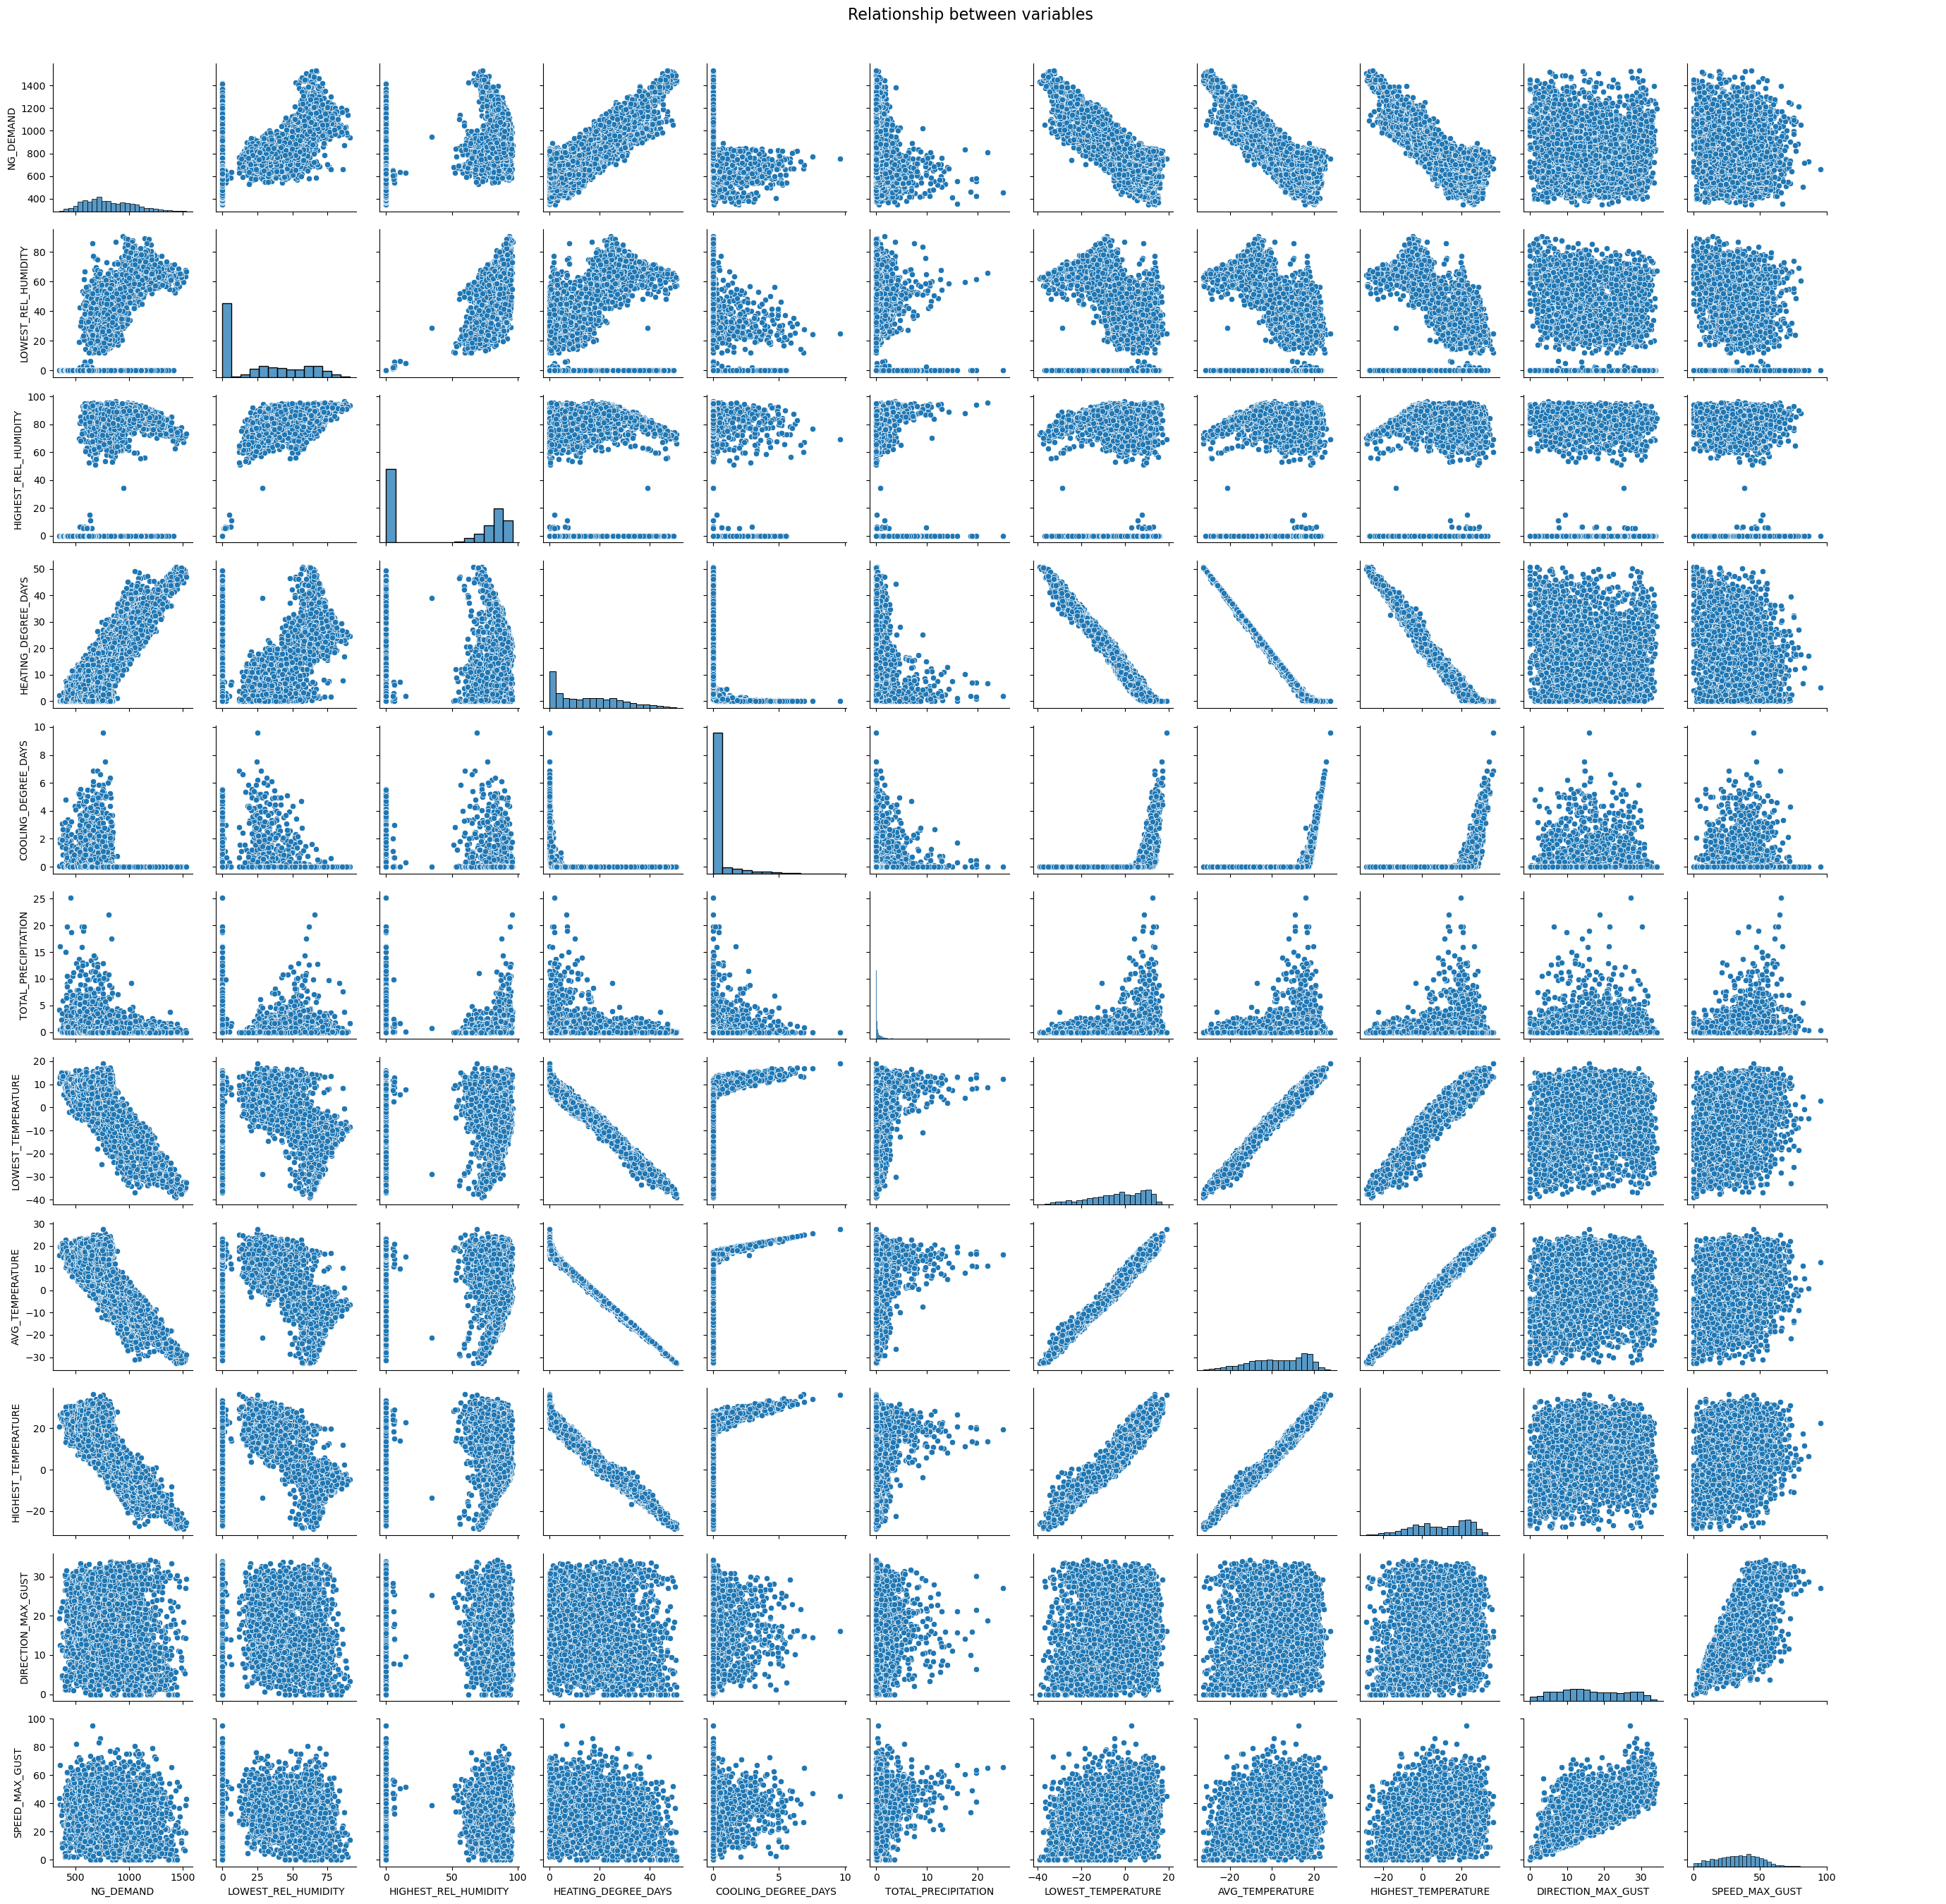

In [23]:
# Create a Pairplot to visualize relationships between variables
g = sns.pairplot(merged_df)
g.add_legend()

# Set the title at the top middle of the pair plot
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Relationship between variables", fontsize=16)

# Use plt.tight_layout() to adjust the layout
plt.tight_layout(rect=[0, 0, 0.95, 0.97])
plt.show()

#### 3. Heatmap to analyze the Correlation between Natural Gas demand and Weather factors

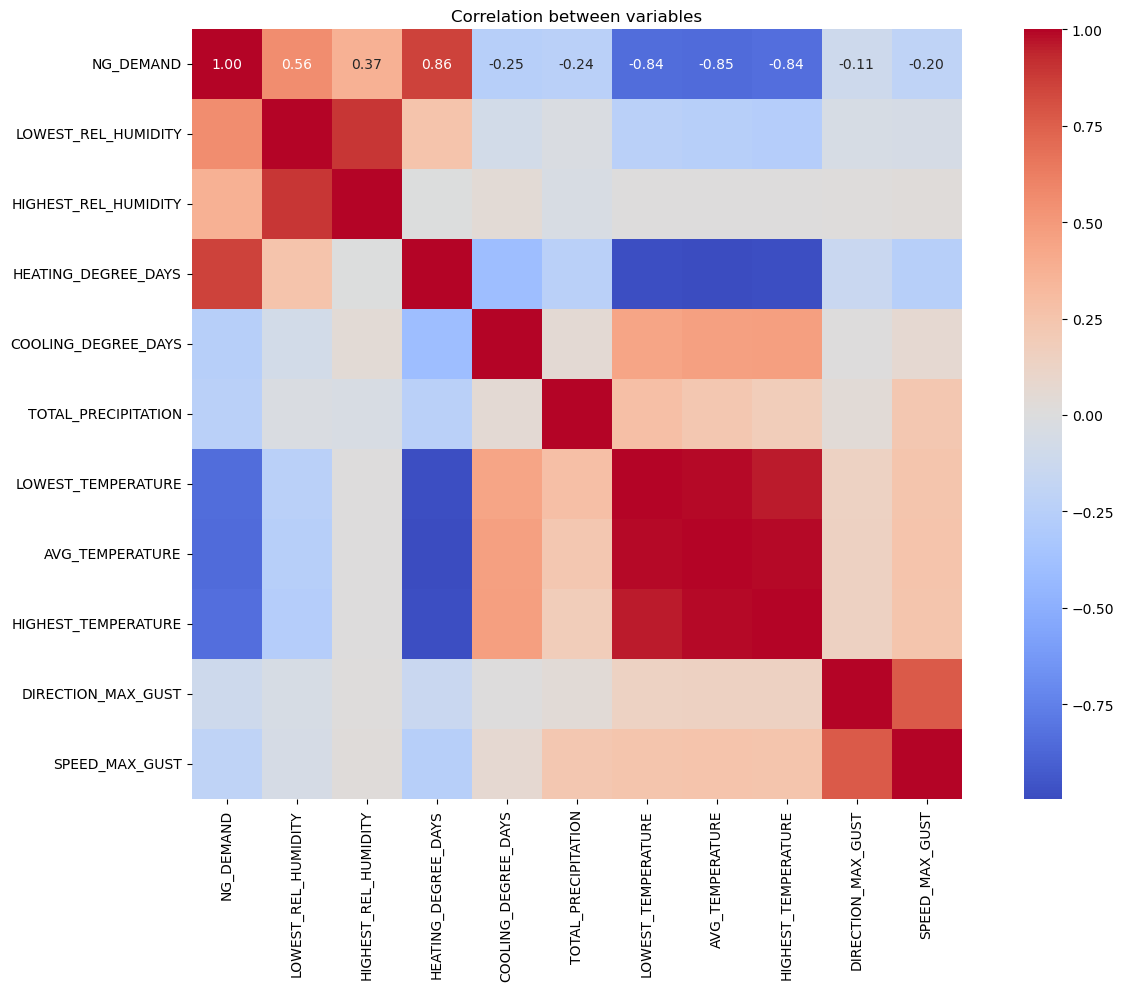

In [24]:
# Drop 'Date' column
df_without_date = merged_df.drop(columns=['DATE'])

# Correlation heatmap between feature variables
plt.figure(figsize=(16,10))
corr = df_without_date.corr()
sns.heatmap(data=corr,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.title('Correlation between variables')
plt.show()

#### Observations:
- The heatmap shows a strong correlation between temperature factors (Lowest, Average, and highest) and the demand for natural gas. While there is a less significant relationship between consumption and wind speed and direction.
- The heating degree days (HDD) factor was highly related to temperature factors, and the correlation coefficient to natural gas consumption is 0.86.
- Additionally, the correlation coefficients of humidity factors (Low and Highest) to natural gas were 0.56 and 0.37, respectively.

#### 4. Yearly Base load and Heating load of Natural Gas in Saskatchewan

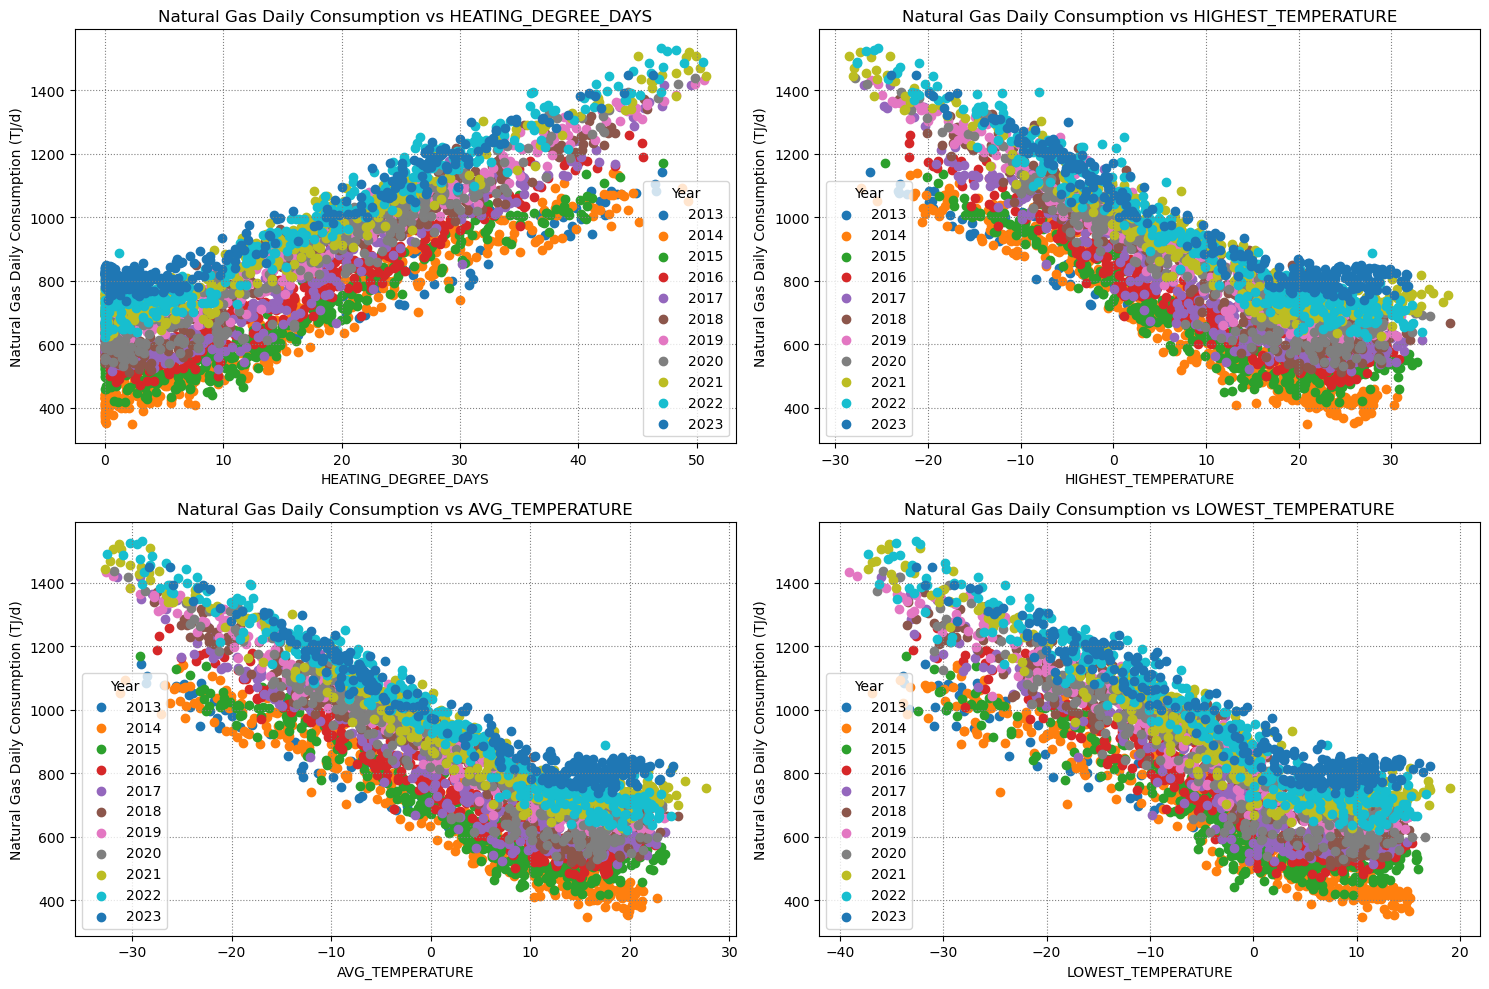

In [26]:
# Copying the merged DataFrame 
data_df = merged_df.copy()

# Extract year from 'DATE' and create a new column 'Year'
data_df['YEAR'] = data_df['DATE'].dt.year

# List of variables to plot against 'NG_DEMAND'
variables = ['HEATING_DEGREE_DAYS', 'HIGHEST_TEMPERATURE', 'AVG_TEMPERATURE', 'LOWEST_TEMPERATURE']

# Get unique years in the dataset
years = data_df['YEAR'].unique()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Loop over each variable
for i, var in enumerate(variables):
    # Get the subplot axes
    ax = axs[i//2, i%2]
    
    # Loop over each year
    for year in years:
        # Create a temporary DataFrame for the current year
        temp_df = data_df[data_df['YEAR'] == year]
        
        # Create a scatter plot for the current variable and year
        ax.scatter(temp_df[var], temp_df['NG_DEMAND'], label=year)
    
    # Set the title, x-label, and y-label of the subplot
    ax.set_title(f'Natural Gas Daily Consumption vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Natural Gas Daily Consumption (TJ/d)')
    ax.legend(title='Year')
    ax.grid(linestyle=":", color='grey')

plt.tight_layout()
plt.show()

#### Observations: 
The scatter plots above show that the system of points for each year is close to linear only to a certain extent.
- **Consumption vs Average Temperature:** It is observed above a temperature of approximately 13 deg. celsius, natural gas consumption is constant, and as the temperature drops below approximately 13 degrees Celsius, an inversely proportional increase in the value of natural gas consumption begins each year.
- **Consumption vs Heating Degree Days (HDD):** The top-left graph depicts the relationship between natural gas consumption and HDD, and above HDD of approximately 5, the heating requirements or gas consumption is considered to be directly proportional to the number of HDD. Specifically, HDD are equal to the number of degrees Celsius a given day’s mean temperature is below 18 °C. Therefore, since the daily mean temperature below which the gas consumption begins to increase is 13 degrees Celsius, the HDD value corresponding to this temperature equals 5 deg. celcius. This confirms the previous explanation of how weather factors affect daily gas consumption.

#### 5. Yearly Boxplot for Natural Gas Demand

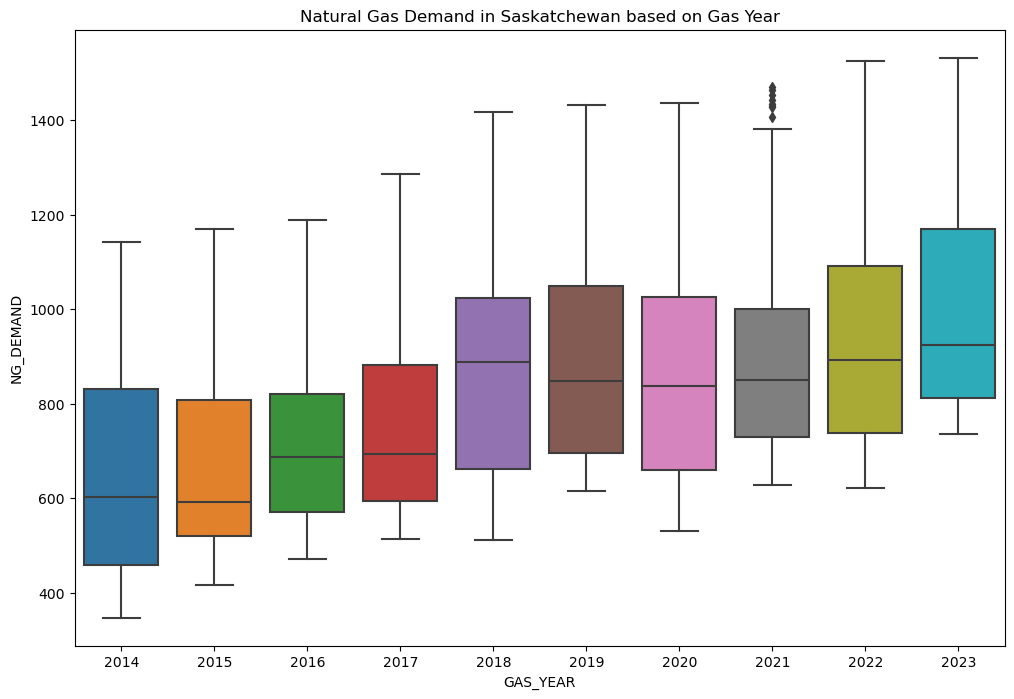

In [26]:
# Extract year from 'DATE' column and create a new column 'Gas_Year'
# Gas year starts from November and ends in October of the next year
data_df['GAS_YEAR'] = data_df['DATE'].apply(lambda x: x.year if x.month < 11 else x.year + 1)

# Create boxplot
plt.figure(figsize=(12, 8))
plt.title('Natural Gas Demand in Saskatchewan based on Gas Year')
sns.boxplot(x='GAS_YEAR', y='NG_DEMAND', data=data_df)
plt.show()

- The above plot suggests that the series has a significant trend.
- Every gas year, which starts from November and ends in October of the next year (e.g November 1, 2022 to October 31, 2023 is considered a Gas Year) natural gas demand are increasing.

## Step 4. Time Series Analysis

### 1. Time Series Decomposition
In general, most time series can be decomposed in three major components: trend, seasonality, and noise. 
- ** 
tr**end shows whether the series is consistently decreasing (downward trend), constant (no trend) or increasing (upward trend) over ti

- **e.
seasona**lity describes the periodic signal in your time ser

- **s. 
noise or res**idual displays the unexplained variance and volatility of the time series.


#### Additive Model

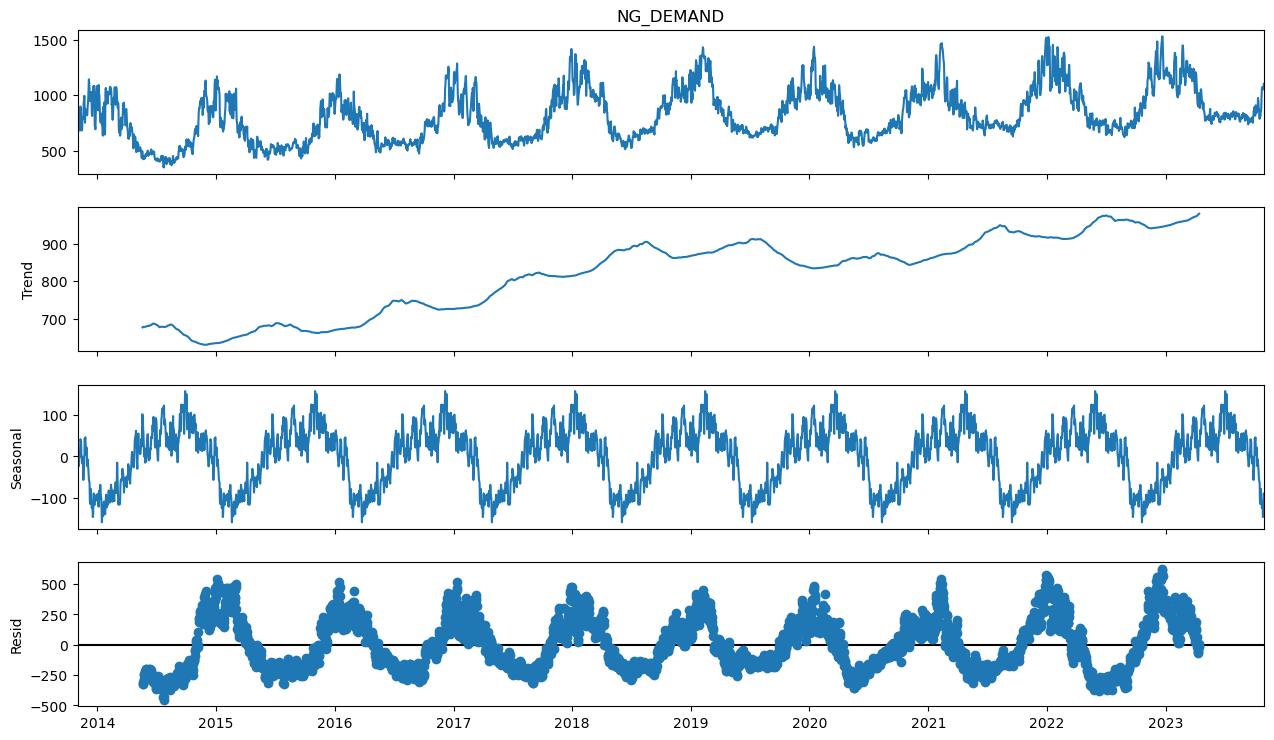

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomp_df = merged_df.copy()

# Create a new DataFrame with 'DATE' as the index
date_index_df = decomp_df.set_index('DATE')

# Decompose the 'NG_DEMAND' of date_index_df
decomposition_ngdemand_date_index = sm.tsa.seasonal_decompose(date_index_df['NG_DEMAND'], model='additive', period=400)

# Now call the plot function
fig = decomposition_ngdemand_date_index.plot()

# Adjust the size of the plot
fig.set_size_inches(14, 8)  # Adjust the values (width, height) as needed
plt.show()

#### Multiplicative model:

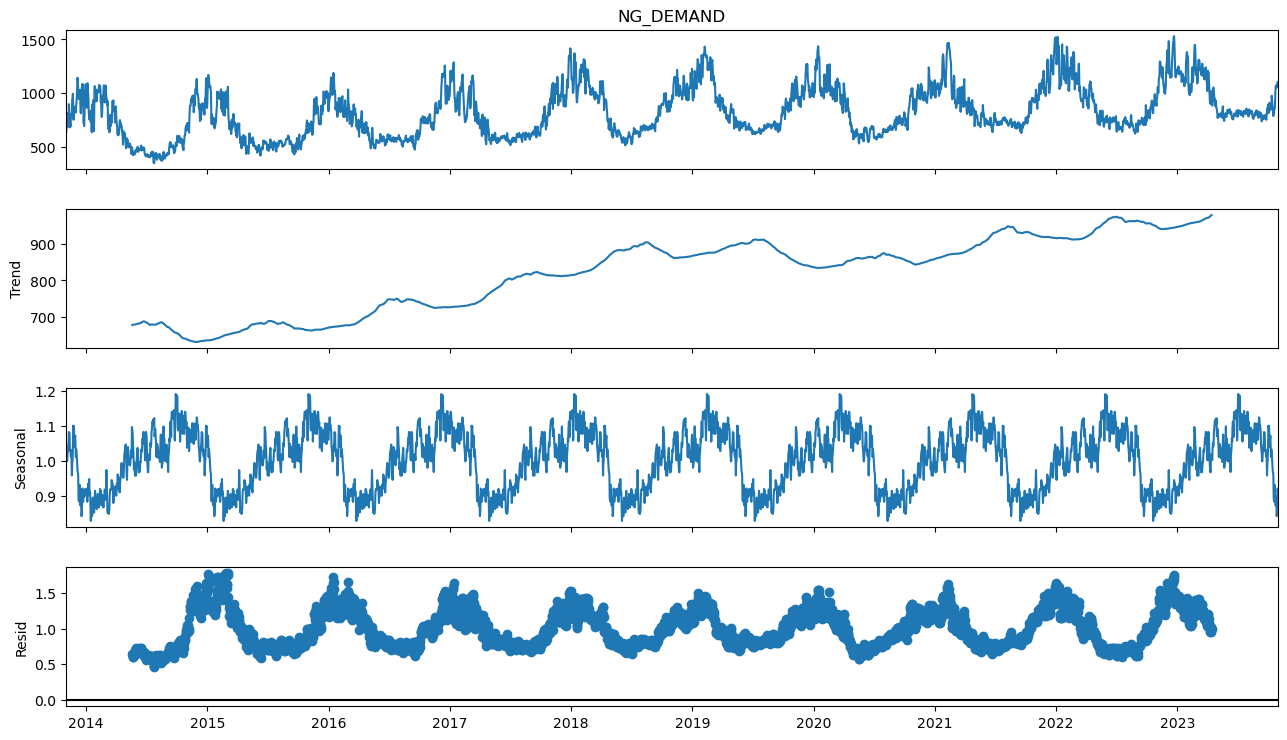

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompose the 'NG_DEMAND' of date_index_df
decomposition_ngdemand_date_index = sm.tsa.seasonal_decompose(date_index_df['NG_DEMAND'], model = 'multiplicative', period=400)

# Now call the plot function
fig = decomposition_ngdemand_date_index.plot()

# Adjust the size of the plot
fig.set_size_inches(14, 8)  # Adjust the values (width, height) as needed
plt.show()

#### Observation

- This time series has a seasonal pattern, i.e., it is influenced by seasonal factors. Seasonality occurs over a fixed and know period (e.g., the quarter of the year, the month, or day of the week). In this case the period seems to be winter and non-winter season.
- We can also observe that there is no constant increase or decrease in trend which would suggest a non-linear trend. Also both frequency and amplitude of seasonal component do not change with time suggesting seasonality, i.e., a seasonal additive model.
- Also, if we compare multiplicative and additive residuals, we can see that the later is much smaller, As a result, additive model (Trend + seasonality) fits the original data much closely.

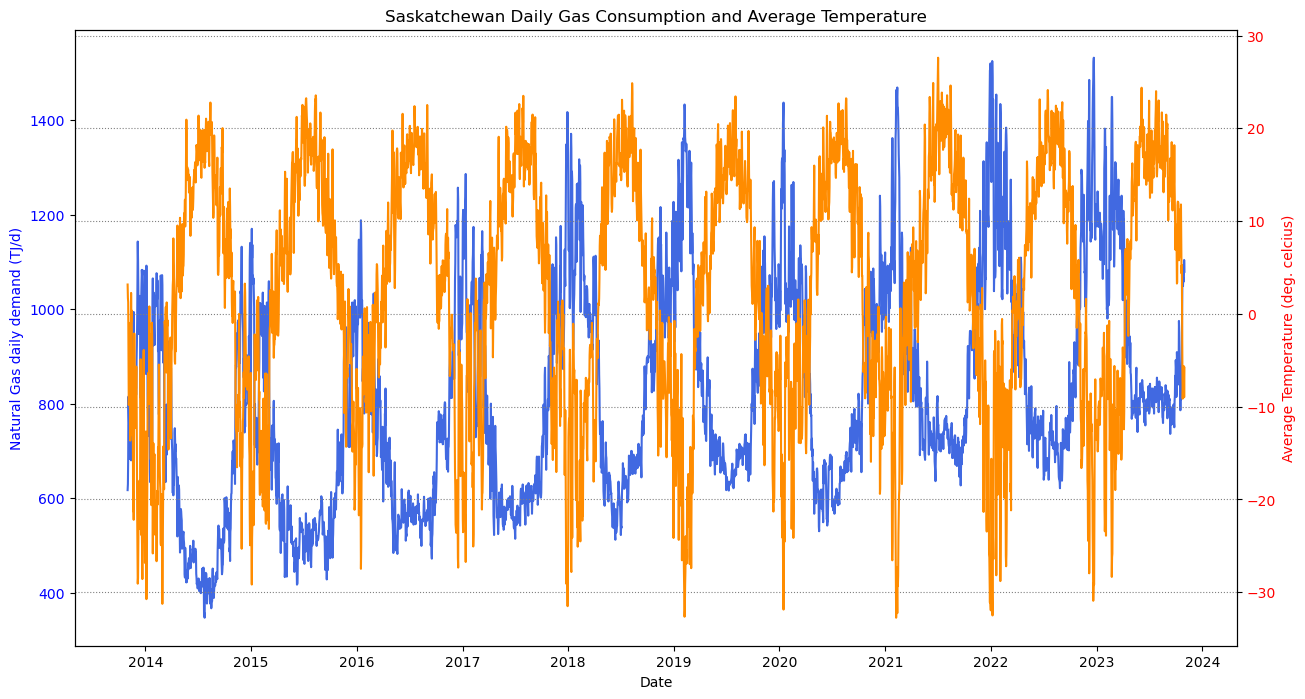

In [29]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(15,8))

# Plot the 'NG_DEMAND' column on the left y-axis
ax1.plot(merged_df['DATE'], merged_df['NG_DEMAND'], color='royalblue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Natural Gas daily demand (TJ/d)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the 'AVG_TEMPERATURE' column on the right y-axis
ax2.plot(merged_df['DATE'], merged_df['AVG_TEMPERATURE'], color='darkorange')
ax2.set_ylabel('Average Temperature (deg. celcius)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a grid to the figure for better visualization of data
plt.grid(linestyle=":", color='grey')
    
# Set the title of the plot
plt.title('Saskatchewan Daily Gas Consumption and Average Temperature')
plt.show()

#### Observations
In the natural gas industry, the year is often divided into two main seasons (Winter and Non-Winter), and the figure above confirms these seasons.
- **Winter:** November through March. This is typically the peak demand season for natural gas due to its use in heating. Prices tend to be higher during this period.
- **Non-Winter:** April through October. This period covers spring, summer, and fall. The demand for natural gas is usually lower during these months, except for occasional spikes in demand from power plants and other industrial/process loads during hot weather.

### 2. Stationary Tests

- **Augmented Dicky-Fuller test (ADF)** is a very popular test for stationarity. However, it can happen that a time series passes the ADF test, without being stationary.
- **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** is another test for checking the stationarity of a time series. It is prudent to apply both tests, so that it can be ensured that the series is truly stationary. Next to that, we cannot forget the importance of also observing the time series plot.
  
Before applying any models, let's check if the time series are Stationary. Stationary comes in many flavours, but here we will use the following definition: A time series is stationary if a shift in time doesn't cause a change in the shape of its distribution. As a result, the mean and standard deviation is not time-dependent. 
Fluctuating rolling mean and standard deviation cane  bth e first indication on Non-stationary time series.

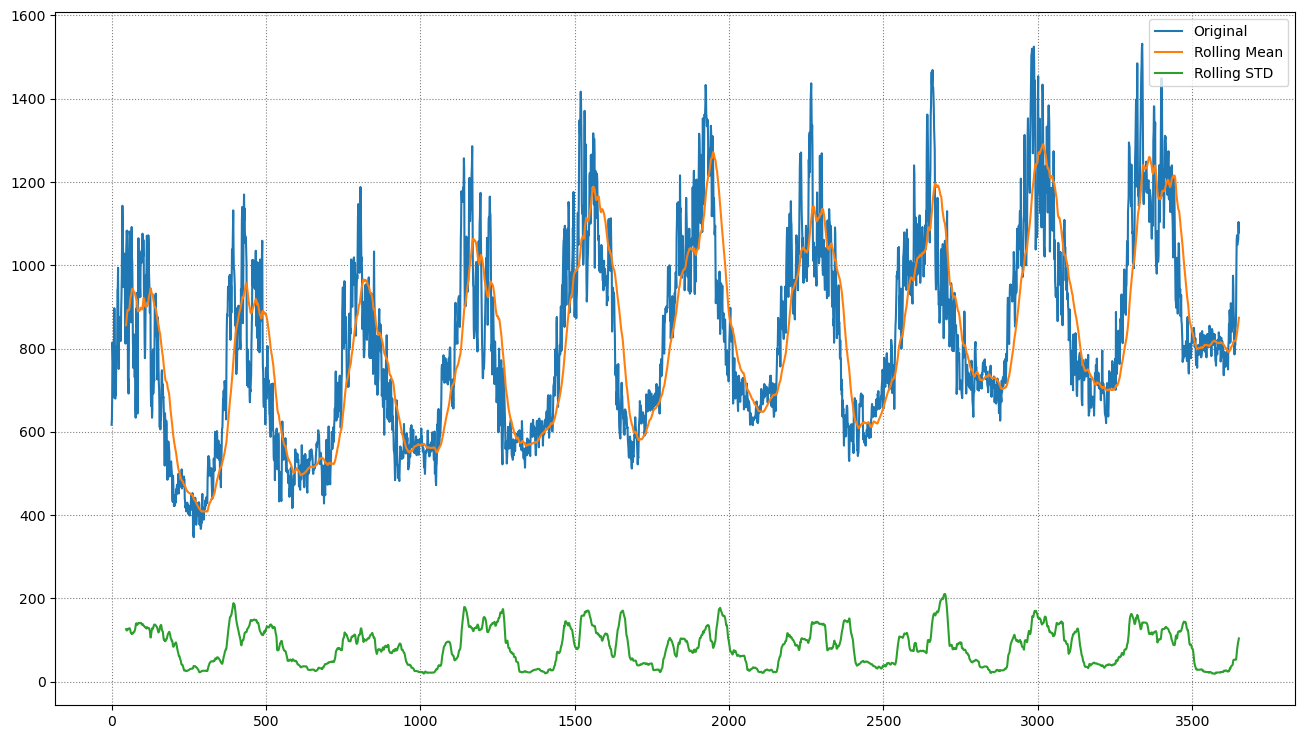

In [34]:
daily_df = merged_df.copy()
def plot_rolling_mean_and_std(dataframe: pd.DataFrame, window: int) -> None:
    # Create a copy of the dataframe to avoid modifying the original one
    df = dataframe.copy()
    
    # Calculate the rolling mean and standard deviation using the specified window size
    roll_mean = df.rolling(window=window).mean()
    roll_std = df.rolling(window=window).std()
    
    # Create a new figure with specified size and background color
    fig, ax = plt.subplots(figsize=(16,9), facecolor='w')
    
    # Plot the original data, rolling mean and rolling standard deviation on the same figure
    ax.plot(df, label='Original')
    ax.plot(roll_mean, label='Rolling Mean')
    ax.plot(roll_std,  label='Rolling STD')
    
    # Add a legend at the upper right corner of the figure
    ax.legend(loc='upper right')
    
    # Add a grid to the figure for better visualization of data
    plt.grid(linestyle=":", color='grey')
    
    # Display the figure
    plt.show()

# Call the function with daily gas demand data and a window size of 48
plot_rolling_mean_and_std(daily_df['NG_DEMAND'], window=48)

#### Observations:
- We can see that the mean and variance of the time series are not constant over time.
- Mean and the variance seem to be following seasonal trends.

Therefore, the series does not look stationary. On this note, we are performing two statistical tests to discover if the series have a unit root or if they are trend-stationary

    Augmented Dickey-Fuller Test
    - The null hypothesis for this test is that there is a unit root, and it is non-stationary.
    - The alternate hypothesis is that the series has no unit root and is stationary.

    Kwiatkowski-Phillips-Schmidt-Shin test for stationary.
    - The null hypothesis for the test is that the data is stationary.
    - The alternate hypothesis for the test is that the data is not stationary.

In [31]:
from statsmodels.tsa.stattools import adfuller, kpss

def perform_adf_test(df) -> None:
  
    adf_stat, p_value, n_lags, n_observ, crit_vals, icbest = adfuller(df)
    
    print('\nAugmented Dickey Fuller Test')
    print('---'*15)
    print('ADF Statistic: %f' % adf_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Number of observations used: {n_observ}')
    print(f'T values corresponding to adfuller test:')
    for key, value in crit_vals.items():
        print(key, value)

def perform_kpss_test(df) -> None:
    kpss_stat, p_value, n_lags, crit_vals = kpss(df, nlags='auto', store=False)
    print('\nKwiatkowski-Phillips-Schmidt-Shin test')
    print('---'*15)
    print('KPSS Statistic: %f' % kpss_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Critical values of KPSS test:')
    for key, value in crit_vals.items():
        print(key, value)

In [32]:
perform_adf_test(daily_df['NG_DEMAND'])
perform_kpss_test(daily_df['NG_DEMAND'])


Augmented Dickey Fuller Test
---------------------------------------------
ADF Statistic: -3.650559
p-value: 0.004865
Number of lags used: 13
Number of observations used: 3638
T values corresponding to adfuller test:
1% -3.432148768574872
5% -2.862334795726108
10% -2.5671930819481976

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 1.907683
p-value: 0.010000
Number of lags used: 37
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


C:\Users\davin\AppData\Local\Temp\ipykernel_13468\1251783421.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, n_lags, crit_vals = kpss(df, nlags='auto', store=False)


The augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test are both used to test for stationarity in the time series.

**ADF Test:**
- The ADF statisticis -3.65. This value is compared against the critical values for the ADF test at the 1%, 5%, and 10% levels, which are -3.43, -2.86, and -2.56, respectively. Since the ADF statistic is less than the critical values, we can reject the null hypothesis of the ADF test, which assumes that the time series is non-stationary. So, the time series is likely stationary.
- The p-value is 0.0048, which is less than 0.05. This provides further evidence to reject the null hypothesis, confirming that the time series is likely stationary.

**KPSS Test**
- The KPSS statistic is 1.907. This value is compared against values for the KPSS test at the 1%, 2.5, 5%, and 10% levels, which are 0.739, 0.574, 0.463, and 0.347, respectively. Since the KPSS statistic is greater than the critical values, we can reject the null hypothesis of the KPSS test, which assumes that the time series is stationary. So, the time series is likely to be non-stationary.
- However, the p-value is 0.01, which is less than 0.05. This would typically indicate that the time series is stationary, contradicting the result from the KPSS statistic.

In summary, the ADF test suggests that the time series is stationary, while the KPSS test suggests that it is not. This contradiction could suggest that the time series is difference stationary, meaning it can be made stationary by differencing the series a certain number of times.

#### Given that the time series is difference stationary, several models could be suitable for modelling and evaluation; see model_building.ipynb in the notebook folders for the chosen models.

### Plot ACF and PACFAutocorrelation and Partial autocorrelation plots are heavily used in time series analysis and forecasting. They can give clues about promising values of parameters. It also can show us if we need to apply differencing or if we have applied it too much.

It is important to made the time series stationary before making these plots. If the ACF values are high and trail off very slowly this is a sign that the data is non-stationarity, so it needs to be differenced. 
If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times. 
We know that our time series is not stationary and need to be differenced. Let’s plot ACF and PACF for the original and differenced time series. g

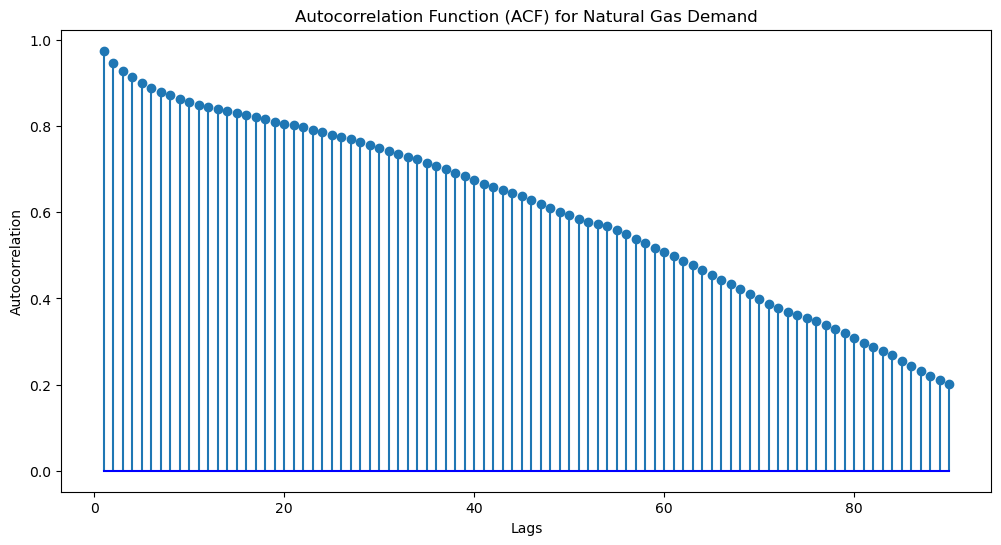

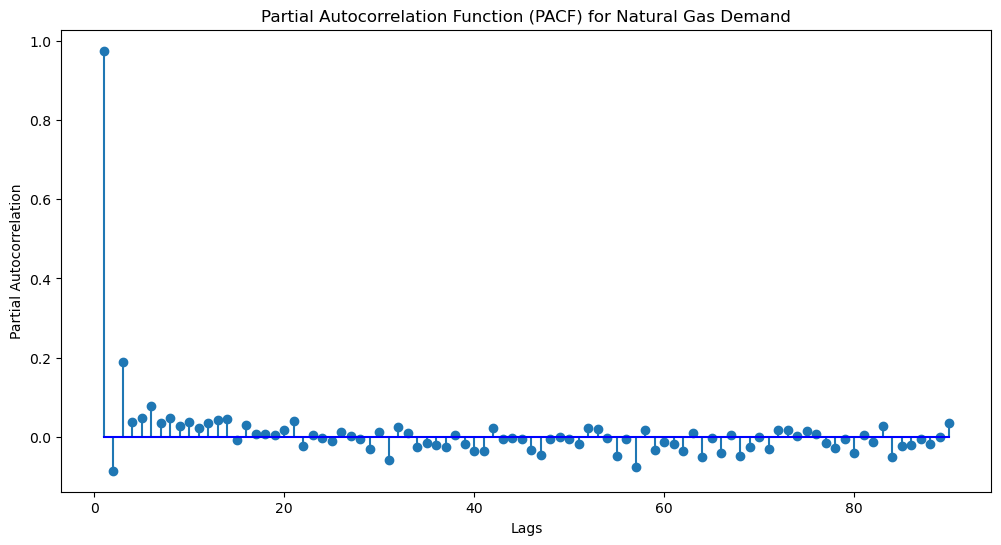

In [35]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF
lags = 90
acf_values = acf(daily_df['NG_DEMAND'], nlags=lags)

# Plot ACF
plt.figure(figsize=(12, 6))
plt.stem(range(1, lags + 1), acf_values[1:], markerfmt='o', basefmt='b-')
plt.title('Autocorrelation Function (ACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Calculate PACF
pacf_values = pacf(daily_df['NG_DEMAND'], nlags=lags)

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(range(1, lags + 1), pacf_values[1:], markerfmt='o', basefmt='b-')
plt.title('Partial Autocorrelation Function (PACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

### ACF and PACF plots after making time series stationary by differencing once

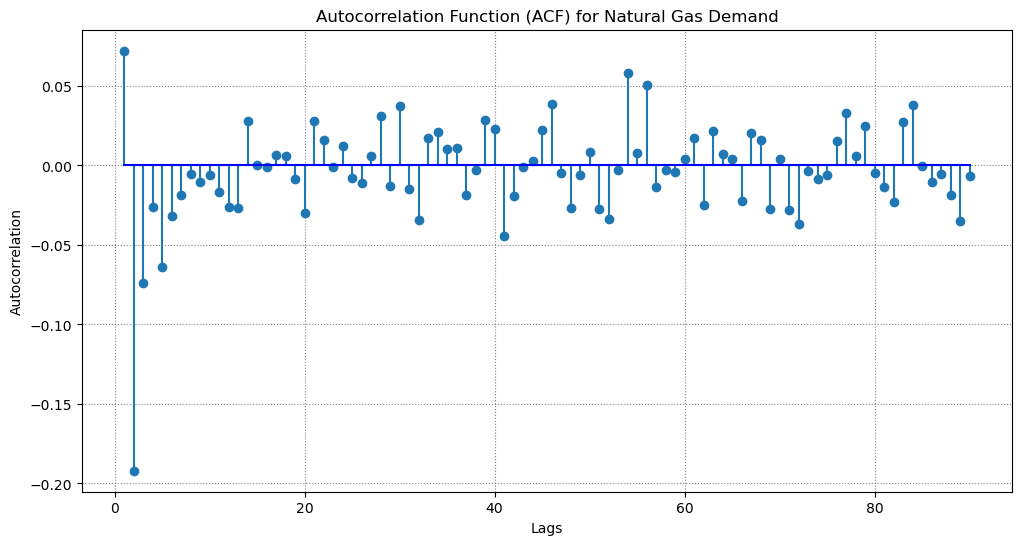

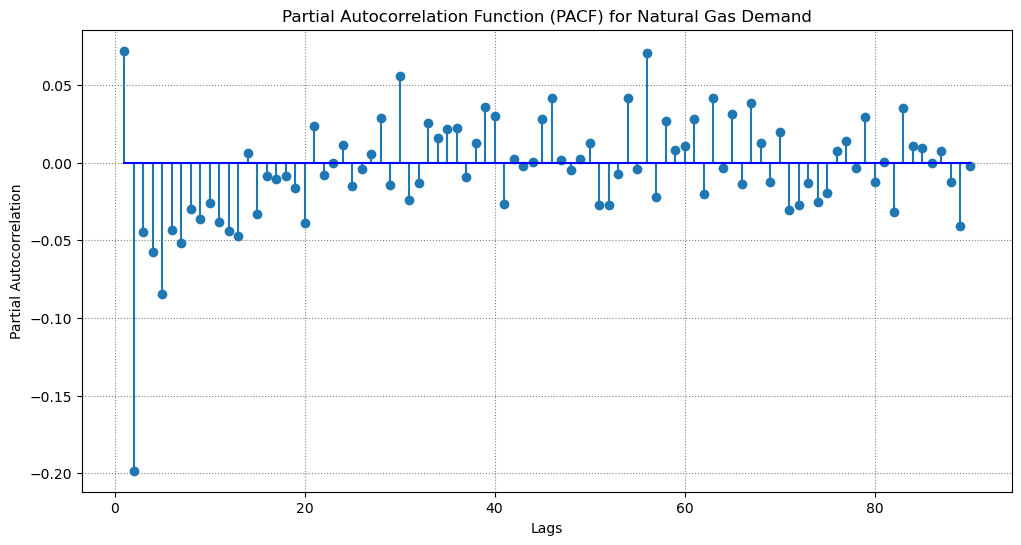

In [39]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF
lags = 90
acf_values = acf(daily_df['NG_DEMAND'].diff().dropna(), nlags=lags)

# Plot ACF
plt.figure(figsize=(12, 6))
plt.stem(range(1, lags + 1), acf_values[1:], markerfmt='o', basefmt='b-')
plt.title('Autocorrelation Function (ACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
# Add a grid to the figure for better visualization of data
plt.grid(linestyle=":", color='grey')
plt.show()

# Calculate PACF
pacf_values = pacf(daily_df['NG_DEMAND'].diff().dropna(), nlags=lags)

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(range(1, lags + 1), pacf_values[1:], markerfmt='o', basefmt='b-')
plt.title('Partial Autocorrelation Function (PACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

# Add a grid to the figure for better visualization of data
plt.grid(linestyle=":", color='grey')
plt.show()

**ACF and PACF plots after making time series stationary by differencing once.**

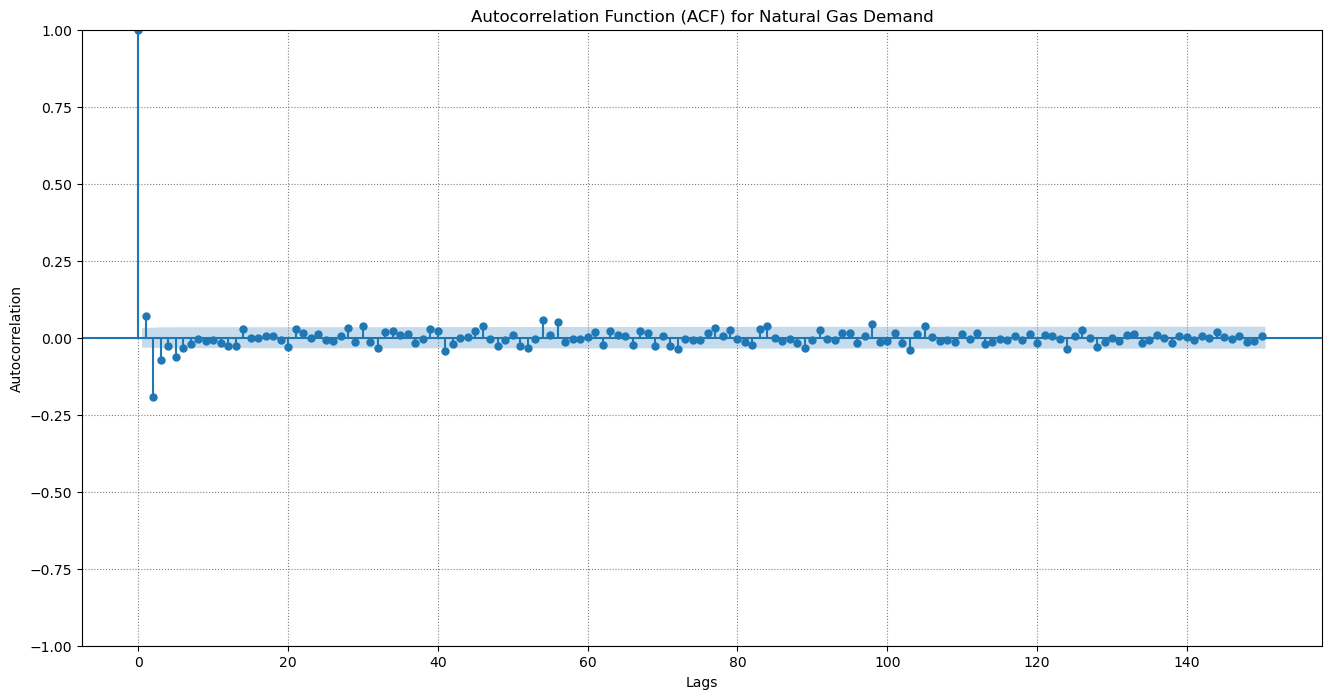

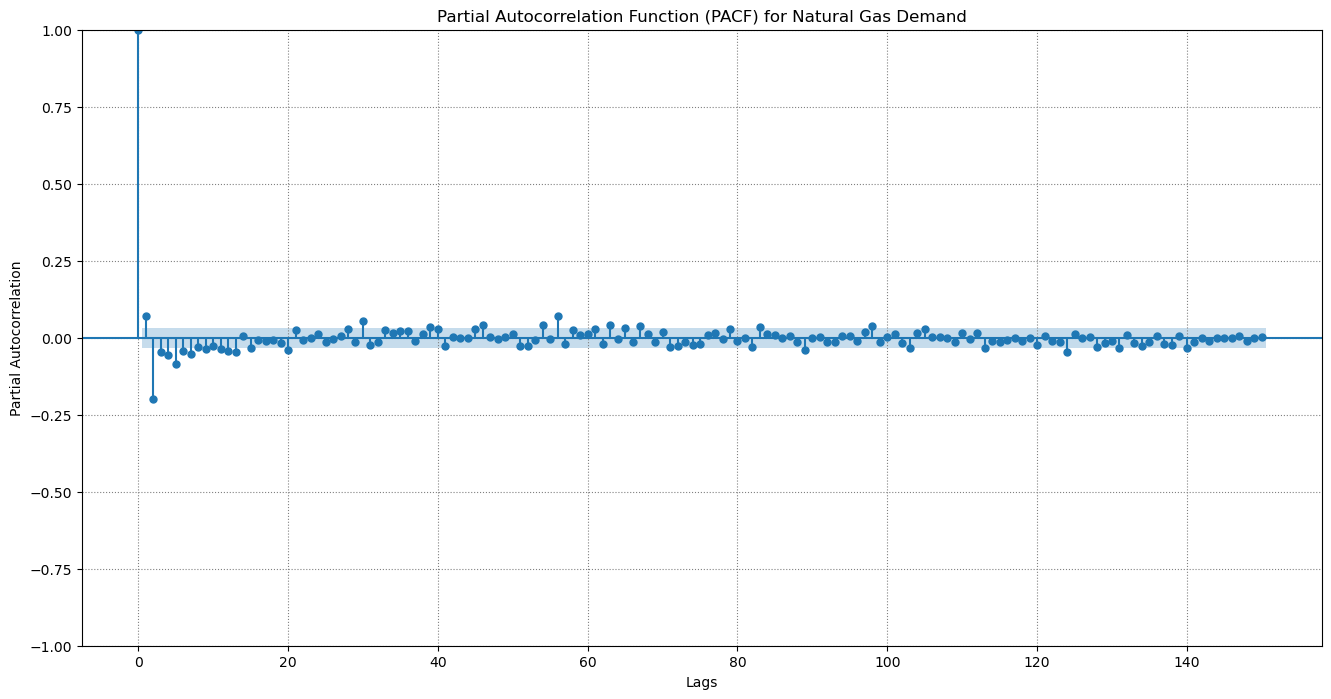

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the default figure size
plt.rcParams["figure.figsize"] = (16,8)

lags = 150

# Plot ACF with confidence band
plot_acf(daily_df['NG_DEMAND'].diff().dropna(), lags=lags, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
# Add a grid to the figure for better visualization of data
plt.grid(linestyle=":", color='grey')
plt.show()

# Plot PACF with confidence band
plot_pacf(daily_df['NG_DEMAND'].diff().dropna(), lags=lags, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) for Natural Gas Demand')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
# Add a grid to the figure for better visualization of data
plt.grid(linestyle=":", color='grey')
plt.show()


**The Autocorrelation Function (ACF) for Natural Gas Demand suggest that:**
-  us:

There’s a significant spike at lag 0, reaching up to an autocorrelation of 1.00. This indicates that every data point correlates perfectly with itself 
t-  lag 0.
Beyond lag 0, all other points hover around the zero line. This suggests that there is little to no correlation between the data points as they are further apart
 in time.
In summary, this ACF graph suggests that the current demand for natural gas is strongly correlated with its immediate past value (lag 0), but not significantly correlated with values from more distant past periods. This could be useful in forecasting future demand based on current and immediate 

**The Partial Autocorrelation Function (PACF) for Natural Gas Demand suggest that:**
-  us:

There’s a significant spike at lag 0, reaching up to 1 on the y-axis. This indicates a strong autocorrelation with itself .
  
-  lag 0.
Beyond lag 0, all other points are clustered around zero. This suggests that there is little to no correlation with past values at hig
her lags.
In summary, this PACF graph suggests that the current demand for natural gas is strongly correlated with its immediate past value (lag 0), but not significantly correlated with values from more distant past periods. This could be useful in forecasting future demand based on current and immediate past data.past data.

## Step 5: Features Selection
Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. Feature selection usually can lead to better learning performance, higher learning accuracy, lower computational cost, and better model interpretability. 
In the Filter method, features are selected based on statistical measures. It is independent of the learning algorithm and requires less computational tim In this case the Pearson corrlation was used to performed the features selection.
- Pearson 

Correla: ion is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.

In [38]:
# Defining the target column name
target_column = 'NG_DEMAND'

# Calculate the correlation of each feature with the target column
correlation_with_target = merged_df.drop(columns=['DATE']).corr()[target_column]

# Set a correlation threshold 
correlation_threshold = 0.5

# Find highly correlated features
highly_correlated_features = set()
for col, correlation in correlation_with_target.items():
    if abs(correlation) > correlation_threshold and col != target_column:
        highly_correlated_features.add(col)

# Create a new dataframe with selected features, including 'DATE'
selected_features = ['DATE'] + ['NG_DEMAND'] + [col for col in merged_df.columns if col in highly_correlated_features]
selected_df = merged_df[selected_features]

# Save the selected_df to 'selected_features.csv'
selected_df.to_csv('../data/selected_features.csv', index=False)

# Display the correlation matrix and the selected dataframe
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
NG_DEMAND               1.000000
LOWEST_REL_HUMIDITY     0.556163
HIGHEST_REL_HUMIDITY    0.371431
HEATING_DEGREE_DAYS     0.857592
COOLING_DEGREE_DAYS    -0.254953
TOTAL_PRECIPITATION    -0.240214
LOWEST_TEMPERATURE     -0.843796
AVG_TEMPERATURE        -0.850060
HIGHEST_TEMPERATURE    -0.839810
DIRECTION_MAX_GUST     -0.113539
SPEED_MAX_GUST         -0.201742
Name: NG_DEMAND, dtype: float64


In [39]:
selected_df.head()

DATE  NG_DEMAND  LOWEST_REL_HUMIDITY  HEATING_DEGREE_DAYS  \
0 2013-11-01        617            44.400000            14.833333   
1 2013-11-02        630            34.133333            16.293333   
2 2013-11-03        688            60.133333            16.726667   
3 2013-11-04        815            66.466667            23.540000   
4 2013-11-05        789            53.000000            27.820000   

   LOWEST_TEMPERATURE  AVG_TEMPERATURE  HIGHEST_TEMPERATURE  
0           -2.933333         3.166667             9.206667  
1           -5.866667         1.706667             9.266667  
2           -2.166667         1.273333             4.706667  
3           -9.106667        -5.540000            -1.906667  
4          -14.966667        -9.820000            -4.633333